# K-Modes

### Clustering Categorical Data

In [ ]:
#!pip install kmodes

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes

In [2]:
df=pd.read_csv("geonames.tsv", sep='\t')
df.head()

,ISO,ISO3,ISO-Numeric,fips,Country,Capital,Area_Sq_Km,Population,Continent,tld,CurrencyCode,CurrencyName,Phone,Postal Code Format,Postal Code Regex,Languages,geonameid,neighbours,EquivalentFipsCode
0,AD,AND,20,AN,Andorra,Andorra la Vella,468.0,77006,EU,.ad,EUR,Euro,376,AD###,^(?:AD)*(\d{3})$,ca,3041565,"ES,FR",NaN
1,AE,ARE,784,AE,United Arab Emirates,Abu Dhabi,82880.0,9630959,AS,.ae,AED,Dirham,971,NaN,NaN,"ar-AE,fa,en,hi,ur",290557,"SA,OM",NaN
2,AF,AFG,4,AF,Afghanistan,Kabul,647500.0,37172386,AS,.af,AFN,Afghani,93,NaN,NaN,"fa-AF,ps,uz-AF,tk",1149361,"TM,CN,IR,TJ,PK,UZ",NaN
3,AG,ATG,28,AC,Antigua and Barbuda,St. John's,443.0,96286,NaN,.ag,XCD,Dollar,+1-268,NaN,NaN,en-AG,3576396,NaN,NaN
4,AI,AIA,660,AV,Anguilla,The Valley,102.0,13254,NaN,.ai,XCD,Dollar,+1-264,NaN,NaN,en-AI,3573511,NaN,NaN


In [3]:
df.describe()

,ISO-Numeric,Area_Sq_Km,Population,geonameid
count,252.000000,2.520000e+02,2.520000e+02,2.520000e+02
mean,434.309524,5.952879e+05,3.016010e+07,2.427870e+06
std,254.663139,1.904818e+06,1.273452e+08,1.632093e+06
min,0.000000,0.000000e+00,0.000000e+00,4.951800e+04
25%,217.000000,1.098000e+03,1.921018e+05,1.163774e+06
50%,436.000000,6.489450e+04,4.617732e+06,2.367967e+06
75%,652.500000,3.622245e+05,1.774194e+07,3.478296e+06
max,894.000000,1.710000e+07,1.392730e+09,8.505033e+06


In [4]:
df  = df.iloc[0: , :11]
df = df[["ISO3", "Country", "Continent", "CurrencyCode", "Area_Sq_Km", "Population"]]
df = df.fillna('Empty')
df.head(200)

,ISO3,Country,Continent,CurrencyCode,Area_Sq_Km,Population
0,AND,Andorra,EU,EUR,468.0,77006
1,ARE,United Arab Emirates,AS,AED,82880.0,9630959
2,AFG,Afghanistan,AS,AFN,647500.0,37172386
3,ATG,Antigua and Barbuda,Empty,XCD,443.0,96286
4,AIA,Anguilla,Empty,XCD,102.0,13254
...,...,...,...,...,...,...
195,SYC,Seychelles,AF,SCR,455.0,96762
196,SDN,Sudan,AF,SDG,1861484.0,41801533
197,SSD,South Sudan,AF,SSP,644329.0,8260490
198,SWE,Sweden,EU,SEK,449964.0,10183175


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1409.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1409.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 1337.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1352.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

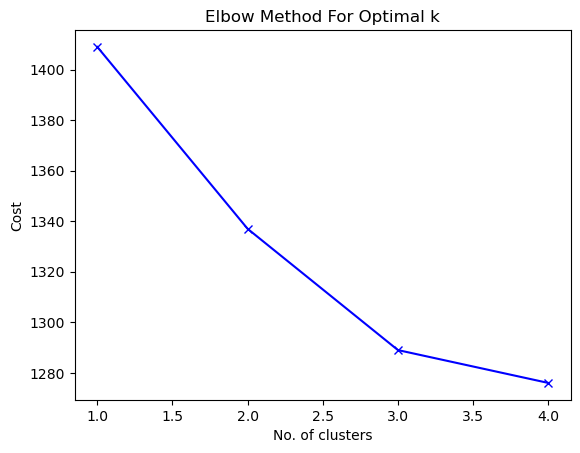

In [5]:
# Elbow curve to find optimal K
cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [6]:
# Fit the cluster
kmodes = KModes(n_jobs = 3, n_clusters = 3, init = 'Huang', random_state = 0)
kmodes.fit_predict(df)

array([1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 1,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 1, 2,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 2, 2,
       2, 1, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 0, 1,
       2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2,
       1, 0, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 2, 2, 1, 0], dtype=uint16)

In [7]:
# Cluster centorid
kmodes.cluster_centroids_

array([['ABW', 'Afghanistan', 'AS', 'USD', '21.0', '0'],
       ['ALA', 'Aland Islands', 'EU', 'EUR', '0.44', '140'],
       ['AGO', 'Algeria', 'AF', 'XOF', '410.0', '0']], dtype='<U32')

In [8]:
# Check the iteration of the clusters created
kmodes.n_iter_

1

In [9]:
# Check the cost of the clusters created
kmodes.cost_

1275.0

In [10]:
# Add the cluster to the dataframe
df['Cluster'] = kmodes.labels_
df['Segment'] = df['Cluster'].map({0:'First', 1:'Second', 2:'Third'})
# Order the cluster
df['Segment'] = df['Segment'].astype('category')
df['Segment'] = df['Segment'].cat.reorder_categories(['First', 'Second', 'Third'])

In [11]:
df.head(10)

,ISO3,Country,Continent,CurrencyCode,Area_Sq_Km,Population,Cluster,Segment
0,AND,Andorra,EU,EUR,468.0,77006,1,Second
1,ARE,United Arab Emirates,AS,AED,82880.0,9630959,0,First
2,AFG,Afghanistan,AS,AFN,647500.0,37172386,0,First
3,ATG,Antigua and Barbuda,Empty,XCD,443.0,96286,0,First
4,AIA,Anguilla,Empty,XCD,102.0,13254,0,First
5,ALB,Albania,EU,ALL,28748.0,2866376,1,Second
6,ARM,Armenia,AS,AMD,29800.0,2951776,0,First
7,AGO,Angola,AF,AOA,1246700.0,30809762,2,Third
8,ATA,Antarctica,AN,Empty,14000000.0,0,0,First
9,ARG,Argentina,SA,ARS,2766890.0,44494502,0,First


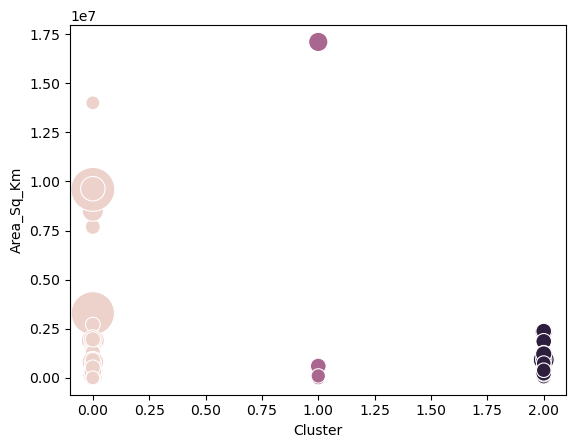

In [12]:
# use the scatterplot function to build the bubble map
ax = sns.scatterplot(data=df, x="Cluster", y="Area_Sq_Km", size="Population",
                hue="Cluster", legend=False, sizes=(100, 1000))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


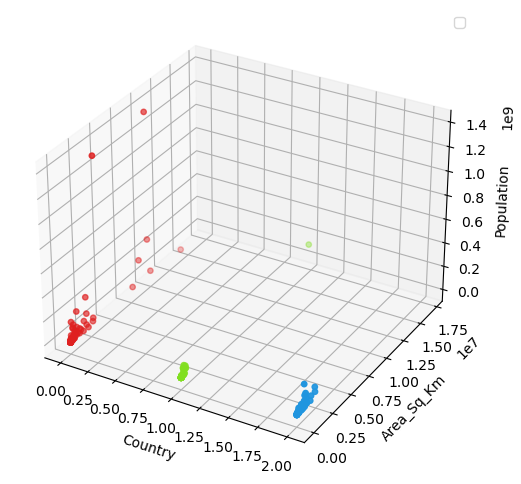

In [13]:
from mpl_toolkits.mplot3d import Axes3D

colors = ['#DF2020', '#81DF20', '#2095DF']

df['c'] = df.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

fig = plt.figure(figsize=(26,6))
ax = fig.add_subplot(131, projection='3d')

ax.legend()

ax.scatter(df.Cluster, df.Area_Sq_Km, df.Population, c=df.c, s=15)
ax.set_xlabel('Country')
ax.set_ylabel('Area_Sq_Km')
ax.set_zlabel('Population')

plt.show()